# Trying the Etude Scripts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import seaborn as sns
import importlib
import grad_descent as gd

sns.set_theme(style="ticks")


In [2]:
importlib.reload(gd)


<module 'grad_descent' from 'c:\\Users\\Semyon\\Documents\\Python\\20_Projects\\ds_etudes\\grad_descent.py'>

## Classification Model based on "circumferentially separated" Data

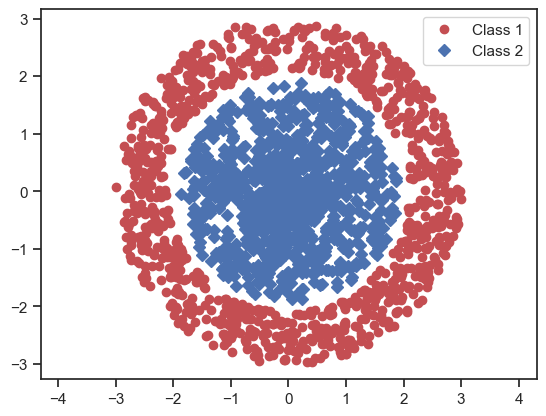

In [3]:
def circle(size, r1, r2):
    rad = np.random.uniform(r1, r2, size=size)
    t = np.random.uniform(0, 1, size=size)
    X = np.zeros((size, 2))
    X[:,0] = rad * np.cos(2*np.pi*t)
    X[:,1] = rad * np.sin(2*np.pi*t)
    return X

X0 = circle (1000, 0, 1.9)
X1 = circle (1000, 2.1, 3)
plt.plot(X1[:,0], X1[:,1], "ro", label="Class 1")
plt.plot(X0[:,0], X0[:,1], "bD", label="Class 2")
plt.axis("equal")
plt.legend()

In [4]:
X = np.vstack((X0, X1))
y = np.array([0]*1000 + [1]*1000)

In [5]:
# need to include w to stick to cost function definition
circ_border = lambda X, w, b: b**2 - (X**2).sum(axis=1)
gd.log_cost(X, y, None, 1, circ_border)  # w=np.array([1., 1]

3.1321725555817594

Text(0.5, 0, 'b')

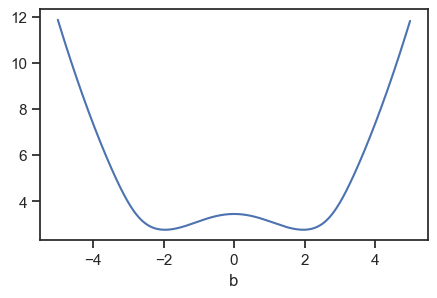

In [6]:
# check cost vs b relationship to see if gd will work
b_range = np.arange(-5.,5., .01)
plt.figure(figsize=(5,3))
plt.plot(
    b_range,
    [gd.log_cost(X, y, None, b, circ_border) for b in b_range]
    )
plt.xlabel("b")


In [7]:
w_, b_ = gd.log_train(
    X, y, np.array([1., 1]), 5, 1e-3, 50_000,
    report=5000, border_func=circ_border
    )
cost_ = gd.log_cost(X,y, np.array([1., 1]), b_, border_func=circ_border)

epoch: 0, w: [0.99999283 1.00002658], b: 4.9995, cost: 11.8635
epoch: 5000, w: [0.98391798 1.1231944 ], b: 2.6560, cost: 3.2270
epoch: 10000, w: [1.02594844 1.09160629], b: 2.0706, cost: 2.7744
epoch: 15000, w: [1.05366762 1.00914186], b: 1.9818, cost: 2.7665
epoch: 20000, w: [1.08017991 0.91996676], b: 1.9654, cost: 2.7662
epoch: 25000, w: [1.10650768 0.82958758], b: 1.9623, cost: 2.7662
epoch: 30000, w: [1.13280179 0.73898167], b: 1.9617, cost: 2.7662
epoch: 35000, w: [1.15908956 0.64833269], b: 1.9616, cost: 2.7662
epoch: 40000, w: [1.18537612 0.55767552], b: 1.9616, cost: 2.7662
epoch: 45000, w: [1.21166245 0.46701679], b: 1.9616, cost: 2.7662


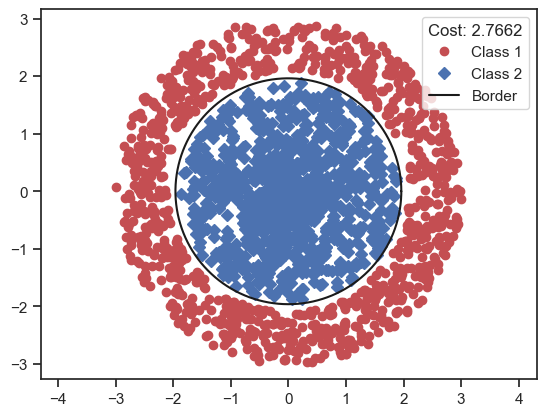

In [8]:
t = np.linspace(0, 2*np.pi, 1000)
x1_ = np.cos(t)
x2_ = np.sin(t)
plt.plot(X1[:,0], X1[:,1], "ro", label="Class 1")
plt.plot(X0[:,0], X0[:,1], "bD", label="Class 2")
plt.plot(b_*x1_, b_*x2_, "k-", label="Border")
plt.ylim(-2.5,2.5)
plt.axis("equal")
plt.legend(loc="upper right", title=f"Cost: {cost_:.4f}")

In [9]:
1 / (1 + np.exp(-circ_border(np.array([[1,0]]), None, b_)))

array([0.94519882])

## Multiple Linear Regression - Weight Vector, **$\vec{w}$**

In [10]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [11]:
gd.update_coef(X_train, y_train, w_init, b_init, 1e-3)

(array([  0.39133808,  18.75376742, -53.36032453, -26.42131611]),
 785.1811368010822)

In [12]:
gd.train(X_train, y_train, np.array([0.,0,0,0]), 0., 5e-7, 1000, cost_func="rmse")

epoch: 0, w: [3.83436251e-04 8.87618240e-07 2.91812441e-07 9.58850134e-06], b: 0.0000, rmse: 314.1114
epoch: 100, w: [3.86635275e-02 8.95596870e-05 2.92244976e-05 9.65585117e-04], b: 0.0000, rmse: 255.4609
epoch: 200, w: [7.67435411e-02 1.77921980e-04 5.74691686e-05 1.91319405e-03], b: 0.0000, rmse: 197.4230
epoch: 300, w: [1.14379766e-01 2.65514848e-04 8.44752917e-05 2.84401479e-03], b: 0.0001, rmse: 140.7322
epoch: 400, w: [1.50736861e-01 3.50652324e-04 1.08741721e-04 3.73169135e-03], b: 0.0001, rmse: 87.8269
epoch: 500, w: [1.81864431e-01 4.24835226e-04 1.25007089e-04 4.46319308e-03], b: 0.0001, rmse: 48.7763
epoch: 600, w: [1.97427897e-01 4.64630374e-04 1.23693561e-04 4.76926786e-03], b: 0.0001, rmse: 38.0508
epoch: 700, w: [2.01218646e-01 4.77735565e-04 1.11455019e-04 4.76853310e-03], b: 0.0001, rmse: 37.3664
epoch: 800, w: [2.01986112e-01 4.83907912e-04 9.66860563e-05 4.69074952e-03], b: 0.0001, rmse: 37.3379
epoch: 900, w: [2.02141332e-01 4.88672326e-04 8.14186200e-05 4.59745413

(array([2.02174136e-01, 4.93110998e-04, 6.62061152e-05, 4.50203674e-03]),
 0.00010304962083871962)

## Univariate  Linear Regression - Scalar Weight, **$w$**

In [13]:
data = sns.load_dataset("penguins")

In [14]:
data["body_mass_kg"] = data["body_mass_g"] * 1e-3
data["flipper_length_cm"] = data["flipper_length_mm"] * 1e-2
data = data.iloc[:, -2:].dropna()

In [15]:
X = data.flipper_length_cm.values
y = data.body_mass_kg.values
w = b = 1
alpha = 1e-3

In [16]:
np.polyfit(X, y, 1)

array([ 4.96855664, -5.78083136])

In [17]:
gd.rmse(X, y, *np.polyfit(X, y, 1))

0.3931236269264684

In [18]:
gd.train(X, y, w, b, alpha, 10000, report=500, cost_func="rmse")

epoch: 0, w: 1.000900547347437, b: 1.0004, rmse: 1.3718
epoch: 500, w: 1.3652573916849668, b: 1.1719, rmse: 0.7020
epoch: 1000, w: 1.4782187986221098, b: 1.2148, rmse: 0.6285
epoch: 1500, w: 1.4989719407304434, b: 1.2115, rmse: 0.6264
epoch: 2000, w: 1.506411222180545, b: 1.2016, rmse: 0.6258
epoch: 2500, w: 1.5120767951530298, b: 1.1909, rmse: 0.6252
epoch: 3000, w: 1.5175044386995071, b: 1.1800, rmse: 0.6246
epoch: 3500, w: 1.5228977198589138, b: 1.1691, rmse: 0.6240
epoch: 4000, w: 1.528283562601017, b: 1.1583, rmse: 0.6234
epoch: 4500, w: 1.5336655155216654, b: 1.1474, rmse: 0.6228
epoch: 5000, w: 1.5390440398566116, b: 1.1366, rmse: 0.6222
epoch: 5500, w: 1.5444191898464343, b: 1.1257, rmse: 0.6216
epoch: 6000, w: 1.549790966176331, b: 1.1149, rmse: 0.6210
epoch: 6500, w: 1.555159362492282, b: 1.1041, rmse: 0.6205
epoch: 7000, w: 1.5605243715113875, b: 1.0932, rmse: 0.6199
epoch: 7500, w: 1.5658859858230016, b: 1.0824, rmse: 0.6193
epoch: 8000, w: 1.5712441979936518, b: 1.0716, rm

(1.5926321906811576, 1.0284847688256982)

In [19]:
vector_mse = np.vectorize(lambda w, b, X=X, y=y: gd.rmse(X, y, w, b))
w_grid, b_grid = np.meshgrid(range(-50,51), range(-50,51))
mse_grid = vector_mse(w_grid, b_grid)
levels = np.logspace(1, 8, 8, base=2)

Text(0, 0.5, 'b')

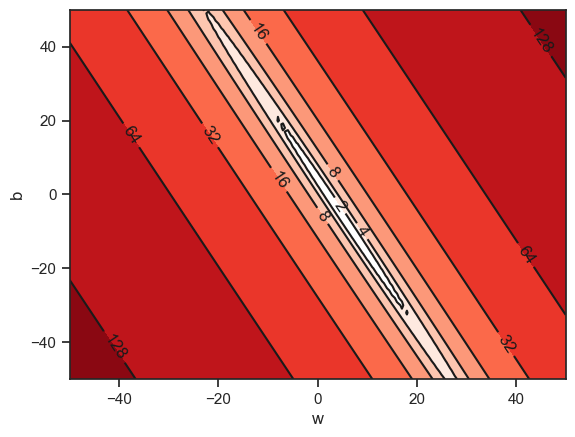

In [20]:
cs0 = plt.contourf(w_grid, b_grid, mse_grid,
    levels=levels, cmap="Reds", norm=LogNorm())
cs1 = plt.contour(cs0, colors="k", levels = cs0.levels)
cs1.clabel(colors="k")
plt.xlabel("w")
plt.ylabel("b")